In [147]:
# Initialize Otter
import otter
grader = otter.Notebook("project2.ipynb")

# Final Project

Please see the [Final Project Description](https://www.cs.williams.edu/~cs104/docs/project2.html) for instructions and deadlines.

All work should appear in this notebook.  We've created some cells for you, but you may add as many additional cells as you like to each part.  Just click the `+` sign in this tab's toolbar to insert a new cell.  Then select "Markdown" from the toolbar's popup menu if you want the new cell to be for text, or "Code" if you want it to be for Python code.  Markdown cells can include basic formatting and are easily identified because they do not have the brackets `[ ]` in the left margin.  Click on any of our formatted text cells to see how to create lists, bold text, etc., or have a look [here](https://www.markdownguide.org/basic-syntax).


In [148]:
# Run this cell to set up the notebook.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines make plots look nice and hide some messy Python warnings.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', np.VisibleDeprecationWarning)

# For interactive visualizations
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Import our table cleaning functions
from table_cleaner import * 

In [149]:
#import functions for correlation coefficent
from cs104_inference import *

## 0. Source of data


This dataset includes the human development index of every country from 1990 to 2021. Addtionally, the columns contain other data values that may be factors related to a country's human development index such as "Gender Inequality Index" and "Mean Years of Schooling - Female," also from the years 1990 to 2021.
According to the World Health Organization, the human development index (HDI) of a country is essentially a composite measure of a country's average achievements in the 3 basic areas of human development: health, knowledge, and standards of living (WHO, 2022). The index ranges from 0 to 1, with 0 being the lowest possible index to 1 being the highest. This is not accounted for in any of the columns of this data set, but it is also important to note that there are 4 tiers for the HDI: 0.8-1.0 (very high human development),0.7 -0.79 (high human development), 0.55-.7 (medium human development), and below 0.55 (low human development).  
According to Human Development reports, the gender inequality index (GII) of a country is essentially a composite measure of a country's gender inequality utilizing 3 dimensions: reproductive health, empowerment, and the labour market. It ranges from 0, where there is equality between men and women, to one, where one gender receives the utmost possible inequality in all measured dimensions. 

Data website: https://www.kaggle.com/datasets/iamsouravbanerjee/human-development-index-dataset

Sources for defintions: 
https://www.who.int/data/nutrition/nlis/info/human-development-index
https://hdr.undp.org/data-center/thematic-composite-indices/gender-inequality-index#/indicies/GII


## 1. Quantitative questions


**Quantiative question 1:** 

What is the correlation coefficient between the human development index of every country in 2021 and the gender inequality index of every country in 2021? 

**Quantitative question 2:** 

Does the change in mean years of female schooling across the years 1990 and 2021 show any varainces in the change in human development index from 1990 and 2021 for countries that have a large change in means years of female schooling versus countries that have a low change?

## 2. Data: Loading and Cleaning

Be sure to upload your csv files to the project on our server, and to clean your data if there are any missing values or other problems.  We have included the table cleaning code from Lab 5.  Be sure to refer to that lab both for a refresher on these tasks.

In [150]:
df = Table().read_table('Human Development Index .csv')

For Question 1, we will only be using the following columns that are being cleaned in the cell below. 

In [151]:
df = valid_rows_for_column(df, 'Country', str)
df = valid_rows_for_column(df, 'Human Development Index (2021)', float)
df = valid_rows_for_column(df, 'Gender Inequality Index (2021)', float)
df = valid_rows_for_column(df, 'Mean Years of Schooling, female (2021)', float)

Removed 0 bad row(s) for column Country
Removed 4 bad row(s) for column Human Development Index (2021)
Removed 21 bad row(s) for column Gender Inequality Index (2021)
Removed 0 bad row(s) for column Mean Years of Schooling, female (2021)


## 3. Descriptive statistics


In [152]:
print(df.num_rows)
print(np.median(df.column('Mean Years of Schooling, female (2021)')))
print(np.median(df.column('Gender Inequality Index (2021)')))

170
9.4662689685
0.363


The number of rows indicates the number of countries in the data set. Since it is 170, that means that this data set truly does not contain all the countries in the world, since there are 195 countries in total in the world. 
The median for the mean years of schooling is important so that we get a good sense of what the schooling looks like for women around the world, without the outliers significantly influencing this number. Likewise, the median of the gender inequality index allows us to visualize the general level of inequalities amongst all countries. Addtionally, knowing the median will give us a good idea of what a very low or high value in these categories would look like, so we are wary of outliers in the plot. 

## 4. Data wrangling


Question 1: we will use the table methid ".select()" to select the two columns we need for this question, so that we can smoothly calculate and plot the scatter plot to find the correlation coefficent. 

In [153]:
Q1_dataset = df.select('Human Development Index (2021)', 'Gender Inequality Index (2021)')
Q1_dataset = valid_rows_for_column(Q1_dataset, 'Human Development Index (2021)', float)
Q1_dataset = valid_rows_for_column(Q1_dataset, 'Gender Inequality Index (2021)', float)

Removed 0 bad row(s) for column Human Development Index (2021)
Removed 0 bad row(s) for column Gender Inequality Index (2021)


Question 2: Becaue we are focusing on the changes in the mean schooling for females and human development index from 1990 to 2021, we have to calculate the change from these years for each country. With these calculated changes, we can utilize the ".with_columns" method to add these changes are columns to our data. These new columns would be "change in means years of schooling for females" and "change in human development index." We are finding their absolute value because we are only concerned with the changem regardless of if this change was an increase or decrease. We can use the ".select" method to only have these newly generated columns as our new dataset.
We also have to do some data cleaning after creating these new columns using the valid_rows_for_column() function given to us with the library, to assure that we do not have any NAN values in the table.

In [154]:
#column with change in schooling for females
Q2_dataset = df.with_columns('change in schooling for females',abs(df.column('Mean Years of Schooling, female (2021)')-df.column('Mean Years of Schooling, female (1990)') ))

#column with change in human development index
Q2_dataset = Q2_dataset.with_columns('change in human development index',abs(df.column('Human Development Index (2021)')-df.column('Human Development Index (1990)') ))
Q2_dataset = valid_rows_for_column(Q2_dataset, 'change in schooling for females', float)
Q2_dataset = valid_rows_for_column(Q2_dataset, 'change in human development index', float)
Q2_dataset = Q2_dataset.select('Country','change in schooling for females', 'change in human development index')

#divide countries in 2 groups : little v large, pick # below/above median, 
#ex: hypoth; countries w/ large changes in schooling for females have larger changes in human dev index, null: changes don't/due to randomness
#test: was there a big change, permuatation test
#scatter plot for changes in 2, another column: 
    # * column for change in schooling from 1990 to 2021.
    # * column for change in Human Devlop inex from 1990 to 2021.
    # * column for whether change in schooling from 1990 to 2021 is > median --> mix up true false column and see what avg human development index change is for 2 groups,and create historgram


Removed 23 bad row(s) for column change in schooling for females
Removed 8 bad row(s) for column change in human development index


Question 2 Data Wrangling Cont. 
Now we must create another column containing "True False" values (for our method of data permutation). We will use the median of the change in schooling for females column that we created above to be an indicator of which country belongs inthe true/false category. Countries that have a change in the mean years of schooling for females equal to or above the median will be categoried as true, whereas the rest will be categorized as false. This new column is called 'tfcol' (true/faslsecolumn). To construct it, we will use the apply method, so that these true/false values can easily be assigned to each row.

In [155]:
def tfcol(value):
    if abs(value) >= np.median(Q2_dataset.column('change in schooling for females')):
        return True 
    else:
        return False
Q2_dataset = Q2_dataset.with_column('tfcol', Q2_dataset.apply(tfcol,'change in schooling for females' ))
Q2_dataset = valid_rows_for_column(Q2_dataset, 'tfcol', bool)

# new
#divide countries in 2 groups : little v large, pick # below/above median, 
#ex: hypoth; countries w/ large changes in schooling for females have larger changes in human dev index, null: changes don't/due to randomness
#test: was there a big change, permuatation test
#scatter plot for changes in 2, another column: 
    # * column for change in schooling from 1990 to 2021.
    # * column for change in Human Devlop inex from 1990 to 2021.
    # * column for whether change in schooling from 1990 to 2021 is > median --> mix up true false column and see what avg human development index change is for 2 groups,and create historgram
Q2_dataset

Removed 0 bad row(s) for column tfcol


Country,change in schooling for females,change in human development index,tfcol
Afghanistan,1.96858,0.205,False
Albania,4.99162,0.149,True
United Arab Emirates,6.62702,0.183,True
Argentina,3.34851,0.119,True
Armenia,1.70361,0.103,False
Australia,1.82685,0.086,False
Austria,2.34279,0.091,False
Burundi,1.66952,0.136,False
Belgium,3.31124,0.121,False
Benin,2.5464,0.166,False


Question 1: Utilizing the library given in class, we will find the a value (the slope) and the b-value(the y-intecept) of the linear regression line of best fit for the scatter olot between the human development index 2021 and the gender inequality index 2021. 

## 5. Visualizations


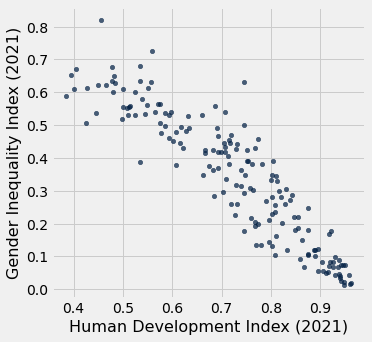

In [156]:
Q1_dataset.scatter('Human Development Index (2021)')

We decided to make a visualization for the scatterplot between HDI (2021) and GII(2021), as it would give us a good understsnding of what the correlation coefficent may be and what the line of best fit may look like. Evidently, we see that there is a general negative association from this plot, so as the human development index for 2021 for ever country increases, the GII decreases. This means that we can estimate that our correlation coefficent will defintely be negative, and most likely not be 0, and smaller than -0.5.

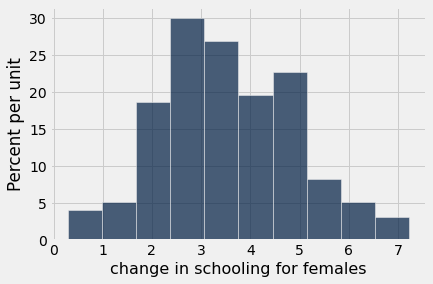

In [157]:
Q2_dataset.select('change in schooling for females').hist('change in schooling for females')

For our second question, we decided to do a histogram that plotted the changes in mean years of schooling for females from 1990 to 2021. We decided to plot this as a way of assessing if using the median as an indicator for the 'true false column' for the permutation test was more optimal than using another statistic, such as the mean. If there was a lot of outliers, but few values in the middle of those outliers, then the median would perhaps not be the best statstic to use in terms of categorizing the 'middle numbers' (non-outliers), and we would instead use the mean. However, as shown from the histogram, using the median will not pose as an obstacle or a potentail misrepresentation of data, as there is a large amount of outliers, and the changes are spread out. Becuase the bars are not particularly skewed to one side, we then know that the change in years of schooling did not drastically occur in certain countries but remain the same for others, and that this change was varied in some ways. 

## 6. Statistical Inference

Categories: 
- Hypothesis test
- Estimation (e.g. confidence intervals via bootstrapping) 
- Prediction (e.g. correlation or a linear regression line fit from a scatter plot) 


Q1: Utilizing the library given in class, we calculated the linear regression of the Human Development Index (2021) and the GII (2021). The linear regression gives us two values, a, the slope, and b, the y-intercept of the regression line. Below, it is plotted on the scatter plot, along with the residual plot.

In [158]:
a = linear_regression(Q1_dataset, 'Human Development Index (2021)', 'Gender Inequality Index (2021)').item(0)
b = linear_regression(Q1_dataset, 'Human Development Index (2021)', 'Gender Inequality Index (2021)').item(1)
print('a = ', a, '; b = ', b)

a =  -1.177720887679118 ; b =  1.1952936673631298


From the residual plot, we can see that there is no relationship between the HDI(2021) (the x-values) and the y (the residual), showing that we do not need to be concerned about nonlinearity and heteroscadisticality, meaning that it is suitable to use a regression line specifcially. As shown from the calculated pearson_correlation, which is very close to -1, there is a strong negative relationship, so as the HDI (2021) increases, the GII (2021) decreases. This relationship is of course, only through stastistics, and not any scientific facts regarding causuation. There is merely a clear negative association within the data. Additionally, as shown from the calculated R2 scaore, which is above 0.5, and close to 1, shows that the data fit the regression model strongly.

Write text here.

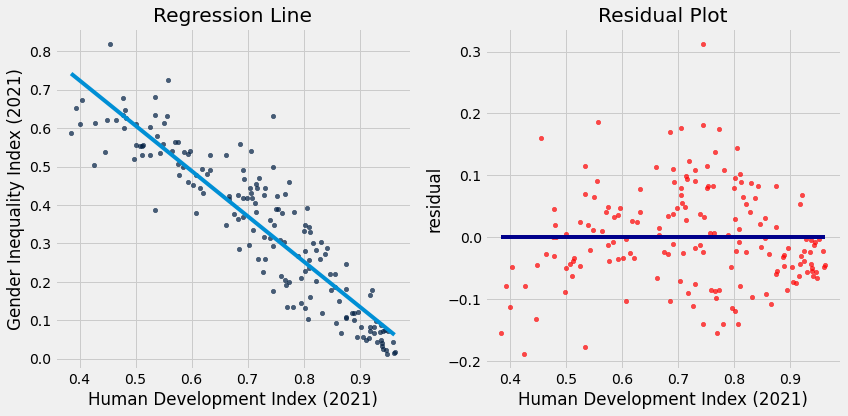

In [159]:
plot_regression_line_and_residuals(Q1_dataset,'Human Development Index (2021)', 'Gender Inequality Index (2021)',a , b)

In [160]:
r = pearson_correlation(Q1_dataset,'Human Development Index (2021)', 'Gender Inequality Index (2021)')
r

-0.9133970778944027

In [161]:
r2 = r2_score(Q1_dataset, 'Human Development Index (2021)', 'Gender Inequality Index (2021)',a , b)
r2

0.8342942219060351

Q2: we will do pemutation tests to asses whether changes in the mean years of schooling for females has a statistical association with the change in the HDI. 
For this we will have null and alternate hypothesis: 

Alternate hypothesis: The average change in human development for countries with higher changes in means schooling years for females is different compared to countries with lower changes in mean schooling for females.

Null hypothesis: There is no difference. The observed statistic occurred by chance.

First, we start by making a new table containing these means in changes of HDI, for the True and False groups, where group A is the True group and Group B is the False group. This way, we can calculste the observed statistic.

In [162]:
means_table = Q2_dataset.group('tfcol', np.mean)
means = means_table.column('change in human development index mean')
observed_difference = means.item(1) - means.item(0)
observed_difference

0.03156231884057975

The observed staistic demonstrates that there is a slight difference in the means of the changes in HDI of countries with a high change in years of female schooling and countries with a low change in years of female schooling.

Now we must create a function that offers the statsitic we look to simulate, which in this case is the difference in the means of group A and group B.

In [163]:
def abs_difference_of_means(table, group_label, value_label):
    """
    Inputs: 
        - table: name of table
        - group_label: column label for variable you want to group 
        - value_label: column label for the variable you want to take means of 
    
    Returns: Difference of mean HDI change of the two groups
    """
    # table containing group means
    means_table = table.group(group_label, np.mean)
    
    # array of group means
    means = means_table.column(value_label + ' mean')
    # print(means.item(1),means.item(0) )
    return abs(means.item(1) - means.item(0))


The function below is important to create a shuffled table of countries that contain high and low rates of change in means years of female schooling.

In [164]:
def permutation_sample(table, group_column_name):
    """
    Returns: The table with a new "Shuffled Label" column containing
    the shuffled values of the group column.
    """
    
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement=False).column(group_column_name)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.with_column('Shuffled Label', shuffled_labels)
    
    return shuffled_table

The shuffuled table fucntion will then be used in the function below, where using the abs_difference_of_means function, the difference of means for all the different shuffled data sets generated will be kept in the array "human_dev_simulated_statistics." Because we are only concerned with whether or not these two groups contain differences in changes in HDI, we will be taking the absolute value.

In [165]:
def simulate_human_dev(num_trials):
    
    human_dev_simulated_statistics = make_array()
    
    for i in np.arange(0, num_trials): 

        one_sample = permutation_sample(Q2_dataset, "tfcol")
        statistic_one_sample = abs(abs_difference_of_means(one_sample, 
                                                           "Shuffled Label", 
                                                           "change in human development index"))
        human_dev_simulated_statistics = np.append(human_dev_simulated_statistics, 
                                                      statistic_one_sample)
        
    return human_dev_simulated_statistics



In [ ]:
simulate_human_dev_means = simulate_human_dev(1000)
results = Table().with_column('abs(Group B Mean - Group A Mean)', simulate_human_dev_means)
results.hist()
plots.scatter(observed_difference, 0, color='red', s=60, zorder=3, clip_on=False);

Because the cutoff for the p-value is 0.05, which means that if the p-value is smaller than 0.05 percent, we can conclude our alternative hypothesis, then we reject the null. Therefore, only through these statistics, the average change in human development for countries with higher changes in means schooling years for females is different compared to countries with lower changes in mean schooling for females fromthe years 1990 to 2021. This means that it is not likely that our observed stastic occurred by chance.

In [ ]:
#calculate p-value
sum(simulate_human_dev_means >= observed_difference) / len(simulate_human_dev_means)

##  Additional work

What if we wanted to explore whether the changes in human development was higher for countries with higher changes in mean years of schooling for females than counries with lower changes in schooling? We can do that through taking out the absolute value from the functions. Then we can set up the following alternate and null hypothesis: 

Alternate hypotehsis: For countries that have a higher changes in the mean years of schooling for females, there is also a higher change in the HDI from 1990 to 2021, compared to countries with low changes in the mean years of schooling for females.

Null Hypothesis: There is no difference and the observed stastistic occurred by chance.

In [ ]:
def difference_of_means(table, group_label, value_label):
    """
    Inputs: 
        - table: name of table
        - group_label: column label for variable you want to group 
        - value_label: column label for the variable you want to take means of 
    
    Returns: Difference of mean birth weights of the two groups
    """
    # table containing group means
    means_table = table.group(group_label, np.mean)
    
    # array of group means
    means = means_table.column(value_label + ' mean')
    # print(means.item(1),means.item(0) )
    return means.item(1) - means.item(0)

def simulate_human_dev_no_abs(num_trials):
    
    human_dev_simulated_statistics = make_array()
    
    for i in np.arange(0, num_trials): 

        one_sample = permutation_sample(Q2_dataset, "tfcol")
        statistic_one_sample = difference_of_means(one_sample, 
                                                           "Shuffled Label", 
                                                           "change in human development index")
        human_dev_simulated_statistics = np.append(human_dev_simulated_statistics, 
                                                      statistic_one_sample)
        
    return human_dev_simulated_statistics


simulate_human_dev_means_noabs = simulate_human_dev_no_abs(1000)
results_noabs = Table().with_column('Group B Mean - Group A Mean', simulate_human_dev_means_noabs)
results_noabs.hist()
plots.scatter(observed_difference, 0, color='red', s=60, zorder=3, clip_on=False);
#there is an associaion, higher changes in human development index 

In [ ]:
sum(simulate_human_dev_means_noabs >= observed_difference) / len(simulate_human_dev_means_noabs)

Since the observable stastistic lies to the right, and the p-value is still at 0, the alternative hypothesis si still approved. This means that for countries that have a higher changes in the mean years of schooling for females, there is also a higher change in the HDI from 1990 to 2021, compared to countries with low changes in the mean years of schooling for females.

Using previous lectures, we created a selectable option for plotting the GII from 1990 to 2021 and the HDI from 1990 to 2021 for a particular country.

In [ ]:

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def dataset(country): 
        df2 = df.where('Country', are.equal_to(country))
        counter = 5
        counter2= 592
        human_dev= make_array()
        gender_inequality = make_array()
        for i in np.arange(32):
            human_dev = np.append(human_dev, df2[counter].item(0))
            gender_inequality = np.append(gender_inequality, df2[counter2].item(0))
            counter+=1
            counter2+=1

        df3 = Table().with_columns('human_dev', human_dev, 'gender',gender_inequality )
        df3 = valid_rows_for_column(df3, 'human_dev', float)
        df3 = valid_rows_for_column(df3, 'gender', float)

        return df3

def f(x):
        a1 = linear_regression(dataset(x), 'human_dev', 'gender').item(0)
        b1 = linear_regression(dataset(x), 'human_dev', 'gender').item(1)
        return plot_scatter_with_line(dataset(x), 'human_dev', 'gender',a1 , b1)

    
_ = interact(f, x=df.column('Country'))



## 7. Ethics


The dataset we analyzed was found on a website called Kaggle. This website contains numerous public datasets and public notebooks that people can use for data analysis work for free. Due to the way the data was produced by researchers and the way it was displayed online, information regarding consent and anonymity were not available to the public. This may pose an ethical issue, because users are not provided with specific information as to how the data was collected. In addition, because the data has been aggregated by country level, this type of data collection can reinforce stereotypes about certain developing countries. This also raises questions regarding ethicality because measuring properties of people or societal groups could potentially inflate or create stereotypes about said people or societal groups, but conducting this type of research can also be considered necessary to identify and quantify drastic disparities  regarding important markers of human development such as education and gender gaps around the world. 

## 8. Conclusions



Q1: What is the correlation coefficient between the human development index of every country in 2021 and the gender inequality index of every country in 2021? 

As shown from the linear regression line and the calculated pearson coefficent, which is about -0.91, there is a statstical association between the human development index of every country in 2021 and the gender inequality index of every country in 2021. Although there can be no conclusions made regarding causation, since this is merely based off statistics, this negative relationship between GII and HDI, suggests that perhaps GII is an important factor in determining a country's HDI. This possibility means that there should be more reserach regarding the intersection between gender equity in countries and the human development index. 

Q2:Does the change in mean years of female schooling across the years 1990 and 2021 show any variances in the change in human development index from 1990 and 2021 for countries that have a large change in means years of female schooling versus countries that have a low change?

Through permuatation testing, we split the countries with high and low changes in the mean years of schooling for females into two true/false categories. After shuffling these labels, and then subtracting the mean of the change in the HDI for each category, and plotting the absolute values of these simulated differences on a histogram, it was clear that our p-value was very close to 0, and less than 0.05. This means that our intial alternative hypothesis of there being differences between the HDI changes of these two groups was approved. We then decided to look at what exactly those differences were, and so, due to our observable statistic, we made our alternative hypothesis that countries with high changes in mean years of schooling for females have higher changes in HDI than those with low changes in mean years of schooling. Through making the same plots, except not making the data points positive through absolute value, we found that, our altnerative hypothesis was once again approved. Although, we cannot state that there is a causation of an sort or assert any scientific premises or conclusions, this apparent difference shows that mean years of schooling for females may perhaps be a factor in HDI changes. 


Our stastistical analysis shows that providing equity to all genders is essential, or at least statiscally shown to be, for HDI research. There are other factors to consider regarding gender and HDI, such as more specific indicators of gender inequity, such as average age of marriage for females and average salaries. 

# You're Done!

**Important submission information:** Follow these steps to submit your work:
* Choose **Save Notebook** from the **File** menu.
* **Run the final cell** and click the link below to download the zip file. 

Once you have downloaded that file, go to [Gradescope](https://www.gradescope.com/) and submit the zip file to the corresponding assignment. The name of this assignment is "Final Project". **Be sure your work is saved before running the last cell!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
import glob 
grader.export(pdf=False,files=glob.glob("*.csv") + glob.glob("*.py"))